In [1]:

# imports
import os
import sys
import types
import json
import base64

# figure size/format
fig_width = 10
fig_height = 5
fig_format = 'retina'
fig_dpi = 96
interactivity = ''
is_shiny = False
is_dashboard = False
plotly_connected = True

# matplotlib defaults / format
try:
  import matplotlib.pyplot as plt
  plt.rcParams['figure.figsize'] = (fig_width, fig_height)
  plt.rcParams['figure.dpi'] = fig_dpi
  plt.rcParams['savefig.dpi'] = "figure"
  from IPython.display import set_matplotlib_formats
  set_matplotlib_formats(fig_format)
except Exception:
  pass

# plotly use connected mode
try:
  import plotly.io as pio
  if plotly_connected:
    pio.renderers.default = "notebook_connected"
  else:
    pio.renderers.default = "notebook"
  for template in pio.templates.keys():
    pio.templates[template].layout.margin = dict(t=30,r=0,b=0,l=0)
except Exception:
  pass

# disable itables paging for dashboards
if is_dashboard:
  try:
    from itables import options
    options.dom = 'fiBrtlp'
    options.maxBytes = 1024 * 1024
    options.language = dict(info = "Showing _TOTAL_ entries")
    options.classes = "display nowrap compact"
    options.paging = False
    options.searching = True
    options.ordering = True
    options.info = True
    options.lengthChange = False
    options.autoWidth = False
    options.responsive = True
    options.keys = True
    options.buttons = []
  except Exception:
    pass
  
  try:
    import altair as alt
    # By default, dashboards will have container sized
    # vega visualizations which allows them to flow reasonably
    theme_sentinel = '_quarto-dashboard-internal'
    def make_theme(name):
        nonTheme = alt.themes._plugins[name]    
        def patch_theme(*args, **kwargs):
            existingTheme = nonTheme()
            if 'height' not in existingTheme:
              existingTheme['height'] = 'container'
            if 'width' not in existingTheme:
              existingTheme['width'] = 'container'

            if 'config' not in existingTheme:
              existingTheme['config'] = dict()
            
            # Configure the default font sizes
            title_font_size = 15
            header_font_size = 13
            axis_font_size = 12
            legend_font_size = 12
            mark_font_size = 12
            tooltip = False

            config = existingTheme['config']

            # The Axis
            if 'axis' not in config:
              config['axis'] = dict()
            axis = config['axis']
            if 'labelFontSize' not in axis:
              axis['labelFontSize'] = axis_font_size
            if 'titleFontSize' not in axis:
              axis['titleFontSize'] = axis_font_size  

            # The legend
            if 'legend' not in config:
              config['legend'] = dict()
            legend = config['legend']
            if 'labelFontSize' not in legend:
              legend['labelFontSize'] = legend_font_size
            if 'titleFontSize' not in legend:
              legend['titleFontSize'] = legend_font_size  

            # The header
            if 'header' not in config:
              config['header'] = dict()
            header = config['header']
            if 'labelFontSize' not in header:
              header['labelFontSize'] = header_font_size
            if 'titleFontSize' not in header:
              header['titleFontSize'] = header_font_size    

            # Title
            if 'title' not in config:
              config['title'] = dict()
            title = config['title']
            if 'fontSize' not in title:
              title['fontSize'] = title_font_size

            # Marks
            if 'mark' not in config:
              config['mark'] = dict()
            mark = config['mark']
            if 'fontSize' not in mark:
              mark['fontSize'] = mark_font_size

            # Mark tooltips
            if tooltip and 'tooltip' not in mark:
              mark['tooltip'] = dict(content="encoding")

            return existingTheme
            
        return patch_theme

    # We can only do this once per session
    if theme_sentinel not in alt.themes.names():
      for name in alt.themes.names():
        alt.themes.register(name, make_theme(name))
      
      # register a sentinel theme so we only do this once
      alt.themes.register(theme_sentinel, make_theme('default'))
      alt.themes.enable('default')

  except Exception:
    pass

# enable pandas latex repr when targeting pdfs
try:
  import pandas as pd
  if fig_format == 'pdf':
    pd.set_option('display.latex.repr', True)
except Exception:
  pass

# interactivity
if interactivity:
  from IPython.core.interactiveshell import InteractiveShell
  InteractiveShell.ast_node_interactivity = interactivity

# NOTE: the kernel_deps code is repeated in the cleanup.py file
# (we can't easily share this code b/c of the way it is run).
# If you edit this code also edit the same code in cleanup.py!

# output kernel dependencies
kernel_deps = dict()
for module in list(sys.modules.values()):
  # Some modules play games with sys.modules (e.g. email/__init__.py
  # in the standard library), and occasionally this can cause strange
  # failures in getattr.  Just ignore anything that's not an ordinary
  # module.
  if not isinstance(module, types.ModuleType):
    continue
  path = getattr(module, "__file__", None)
  if not path:
    continue
  if path.endswith(".pyc") or path.endswith(".pyo"):
    path = path[:-1]
  if not os.path.exists(path):
    continue
  kernel_deps[path] = os.stat(path).st_mtime
print(json.dumps(kernel_deps))

# set run_path if requested
run_path = 'L2hvbWUvY2VydmFmL2RlZXBsZWFybmluZy1pbWFnZS1hbmFseXNpcy13b3Jrc2hvcA=='
if run_path:
  # hex-decode the path
  run_path = base64.b64decode(run_path.encode("utf-8")).decode("utf-8")
  os.chdir(run_path)

# reset state
%reset

# shiny
# Checking for shiny by using False directly because we're after the %reset. We don't want
# to set a variable that stays in global scope.
if False:
  try:
    import htmltools as _htmltools
    import ast as _ast

    _htmltools.html_dependency_render_mode = "json"

    # This decorator will be added to all function definitions
    def _display_if_has_repr_html(x):
      try:
        # IPython 7.14 preferred import
        from IPython.display import display, HTML
      except:
        from IPython.core.display import display, HTML

      if hasattr(x, '_repr_html_'):
        display(HTML(x._repr_html_()))
      return x

    # ideally we would undo the call to ast_transformers.append
    # at the end of this block whenver an error occurs, we do 
    # this for now as it will only be a problem if the user 
    # switches from shiny to not-shiny mode (and even then likely
    # won't matter)
    import builtins
    builtins._display_if_has_repr_html = _display_if_has_repr_html

    class _FunctionDefReprHtml(_ast.NodeTransformer):
      def visit_FunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

      def visit_AsyncFunctionDef(self, node):
        node.decorator_list.insert(
          0,
          _ast.Name(id="_display_if_has_repr_html", ctx=_ast.Load())
        )
        return node

    ip = get_ipython()
    ip.ast_transformers.append(_FunctionDefReprHtml())

  except:
    pass

def ojs_define(**kwargs):
  import json
  try:
    # IPython 7.14 preferred import
    from IPython.display import display, HTML
  except:
    from IPython.core.display import display, HTML

  # do some minor magic for convenience when handling pandas
  # dataframes
  def convert(v):
    try:
      import pandas as pd
    except ModuleNotFoundError: # don't do the magic when pandas is not available
      return v
    if type(v) == pd.Series:
      v = pd.DataFrame(v)
    if type(v) == pd.DataFrame:
      j = json.loads(v.T.to_json(orient='split'))
      return dict((k,v) for (k,v) in zip(j["index"], j["data"]))
    else:
      return v

  v = dict(contents=list(dict(name=key, value=convert(value)) for (key, value) in kwargs.items()))
  display(HTML('<script type="ojs-define">' + json.dumps(v) + '</script>'), metadata=dict(ojs_define = True))
globals()["ojs_define"] = ojs_define
# globals()["__spec__"] = None

{"/home/cervaf/miniforge-pypy3/envs/adv-ml/lib/python3.10/importlib/_bootstrap.py": 1687561148.5241873, "/home/cervaf/miniforge-pypy3/envs/adv-ml/lib/python3.10/importlib/_bootstrap_external.py": 1687561148.5241873, "/home/cervaf/miniforge-pypy3/envs/adv-ml/lib/python3.10/codecs.py": 1687561147.2601798, "/home/cervaf/miniforge-pypy3/envs/adv-ml/lib/python3.10/encodings/aliases.py": 1687561147.960184, "/home/cervaf/miniforge-pypy3/envs/adv-ml/lib/python3.10/encodings/__init__.py": 1687561148.0961847, "/home/cervaf/miniforge-pypy3/envs/adv-ml/lib/python3.10/encodings/utf_8.py": 1687561148.2161856, "/home/cervaf/miniforge-pypy3/envs/adv-ml/lib/python3.10/abc.py": 1687561147.2241795, "/home/cervaf/miniforge-pypy3/envs/adv-ml/lib/python3.10/io.py": 1687561147.3481803, "/home/cervaf/miniforge-pypy3/envs/adv-ml/lib/python3.10/stat.py": 1687561147.4961812, "/home/cervaf/miniforge-pypy3/envs/adv-ml/lib/python3.10/_collections_abc.py": 1687561147.26418, "/home/cervaf/miniforge-pypy3/envs/adv-ml/

/tmp/ipykernel_2846344/2551040784.py:25: DeprecationWarning: `set_matplotlib_formats` is deprecated since IPython 7.23, directly use `matplotlib_inline.backend_inline.set_matplotlib_formats()`
  set_matplotlib_formats(fig_format)


In [2]:
#| echo: false
cifar100_categories = [
  'apple',  # id 0
  'aquarium_fish',
  'baby',
  'bear',
  'beaver',
  'bed',
  'bee',
  'beetle',
  'bicycle',
  'bottle',
  'bowl',
  'boy',
  'bridge',
  'bus',
  'butterfly',
  'camel',
  'can',
  'castle',
  'caterpillar',
  'cattle',
  'chair',
  'chimpanzee',
  'clock',
  'cloud',
  'cockroach',
  'couch',
  'crab',
  'crocodile',
  'cup',
  'dinosaur',
  'dolphin',
  'elephant',
  'flatfish',
  'forest',
  'fox',
  'girl',
  'hamster',
  'house',
  'kangaroo',
  'computer_keyboard',
  'lamp',
  'lawn_mower',
  'leopard',
  'lion',
  'lizard',
  'lobster',
  'man',
  'maple_tree',
  'motorcycle',
  'mountain',
  'mouse',
  'mushroom',
  'oak_tree',
  'orange',
  'orchid',
  'otter',
  'palm_tree',
  'pear',
  'pickup_truck',
  'pine_tree',
  'plain',
  'plate',
  'poppy',
  'porcupine',
  'possum',
  'rabbit',
  'raccoon',
  'ray',
  'road',
  'rocket',
  'rose',
  'sea',
  'seal',
  'shark',
  'shrew',
  'skunk',
  'skyscraper',
  'snail',
  'snake',
  'spider',
  'squirrel',
  'streetcar',
  'sunflower',
  'sweet_pepper',
  'table',
  'tank',
  'telephone',
  'television',
  'tiger',
  'tractor',
  'train',
  'trout',
  'tulip',
  'turtle',
  'wardrobe',
  'whale',
  'willow_tree',
  'wolf',
  'woman',
  'worm'
]

In [3]:
import torch
import torchvision

cifar_ds = torchvision.datasets.CIFAR100(root="/tmp", train=True, download=True)

Files already downloaded and verified


In [4]:
x_im, y = cifar_ds[0]

len(cifar_ds), type(x_im), type(y)

(50000, PIL.Image.Image, int)

y = 19 (cattle)


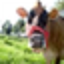

In [5]:
#| echo: false
print("y = %i (%s)" % (y, cifar100_categories[y]))
x_im.resize((x_im.height * 2, x_im.width * 2)).show()

In [6]:
import torch

x0 = torch.Tensor([7]) # This is a point

x1 = torch.Tensor([15, 64, 123]) # This is a vector

x2 = torch.Tensor([[3, 6, 5],
                   [7, 9, 12],
                   [10, 33, 1]]) # This is a matrix

x3 = torch.Tensor([[[[1, 0, 0],
                     [0, 1, 0],
                     [0, 0, 1]],
                    [[2, 0, 1],
                     [0, 2, 3],
                     [4, 1, 5]]]]) # This is a tensor

In [7]:
from torchvision.transforms.v2 import PILToTensor

pre_process = PILToTensor()

x = pre_process(x_im)

x = x.float()

type(x), x.shape, x.dtype, x.min(), x.max()

(torch.Tensor,
 torch.Size([3, 32, 32]),
 torch.float32,
 tensor(1.),
 tensor(255.))

In [8]:
from torchvision.transforms.v2 import Compose, PILToTensor, ToDtype

pre_process = Compose([
  PILToTensor(),
  ToDtype(torch.float32, scale=True)
])

x = pre_process(x_im)

type(x), x.shape, x.dtype, x.min(), x.max()

(torch.Tensor,
 torch.Size([3, 32, 32]),
 torch.float32,
 tensor(0.0039),
 tensor(1.))

In [9]:
cifar_ds = torchvision.datasets.CIFAR100(root="/tmp", train=True, download=True, transform=pre_process)

Files already downloaded and verified


In [10]:
cifar_test_ds = torchvision.datasets.CIFAR100(root="/tmp", train=False, download=True, transform=pre_process)

Files already downloaded and verified


In [11]:
from torch.utils.data import random_split

cifar_train_ds, cifar_val_ds = random_split(cifar_ds, (40_000, 10_000))

In [12]:
import torch.nn as nn

lr_clf_1 = nn.Linear(in_features=3 * 32 * 32, out_features=100, bias=True)
lr_clf_2 = nn.Softmax()

In [13]:
y_hat = lr_clf_2( lr_clf_1( x.reshape(1, -1) ))

type(y_hat), y_hat.shape, y_hat.dtype

/home/cervaf/.local/lib/python3.10/site-packages/torch/nn/modules/module.py:1532: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  return self._call_impl(*args, **kwargs)


(torch.Tensor, torch.Size([1, 100]), torch.float32)

In [14]:
mlp_clf = nn.Sequential(
  nn.Linear(in_features=3 * 32 * 32, out_features=1024, bias=True),
  nn.Tanh(),
  nn.Linear(in_features=1024, out_features=100, bias=True),
  nn.Softmax()
)

In [15]:
y_hat = mlp_clf(x.reshape(1, -1))

type(y_hat), y_hat.shape, y_hat.dtype

(torch.Tensor, torch.Size([1, 100]), torch.float32)

In [16]:
loss_fun = nn.CrossEntropyLoss()

In [17]:
mlp_clf = nn.Sequential(
  nn.Linear(in_features=3 * 32 * 32, out_features=1024, bias=True),
  nn.Tanh(),
  nn.Linear(in_features=1024, out_features=100, bias=True),
  # nn.Softmax() # <- remove this line
)

In [18]:
loss = loss_fun(y_hat, torch.LongTensor([y]))

loss

tensor(4.6055, grad_fn=<NllLossBackward0>)

In [19]:
mlp_clf[0].bias.grad

In [20]:
loss = loss_fun(y_hat, torch.LongTensor([y]))

loss.backward()

In [21]:
mlp_clf[0].bias.grad

In [22]:
from torch.utils.data import DataLoader

cifar_train_dl = DataLoader(cifar_train_ds, batch_size=128, shuffle=True)
cifar_val_dl = DataLoader(cifar_val_ds, batch_size=128)

In [23]:
import torch.optim as optim

optimizer = optim.SGD(mlp_clf.parameters(), lr=0.01, )

In [24]:
#| echo: false
mlp_clf.train()
for x, y in cifar_train_dl:
  optimizer.zero_grad()

  y_hat = mlp_clf( x.reshape(-1, 3 * 32 * 32) ) # Reshape it into a batch of vectors

  loss = loss_fun(y_hat, y)

  loss.backward()

  optimizer.step()

In [25]:
#| echo: false
train_loss = []
train_loss_avg = 0
total_train_samples = 0

mlp_clf.train()
for x, y in cifar_train_dl:
  optimizer.zero_grad()

  y_hat = mlp_clf( x.reshape(-1, 3 * 32 * 32) ) # Reshape it into a batch of vectors

  loss = loss_fun(y_hat, y)

  train_loss.append(loss.item())

  train_loss_avg += loss.item() * len(x)
  total_train_samples += len(x)

  loss.backward()

  optimizer.step()

train_loss_avg /= total_train_samples

In [26]:
#| echo: false
val_loss_avg = 0
total_val_samples = 0

mlp_clf.eval()
with torch.no_grad():
  for x, y in cifar_val_dl:
    y_hat = mlp_clf( x.reshape(-1, 3 * 32 * 32) ) # Reshape it into a batch of vectors
    loss = loss_fun(y_hat, y)

    val_loss_avg += loss.item() * len(x)
    total_val_samples += len(x)

val_loss_avg /= total_val_samples

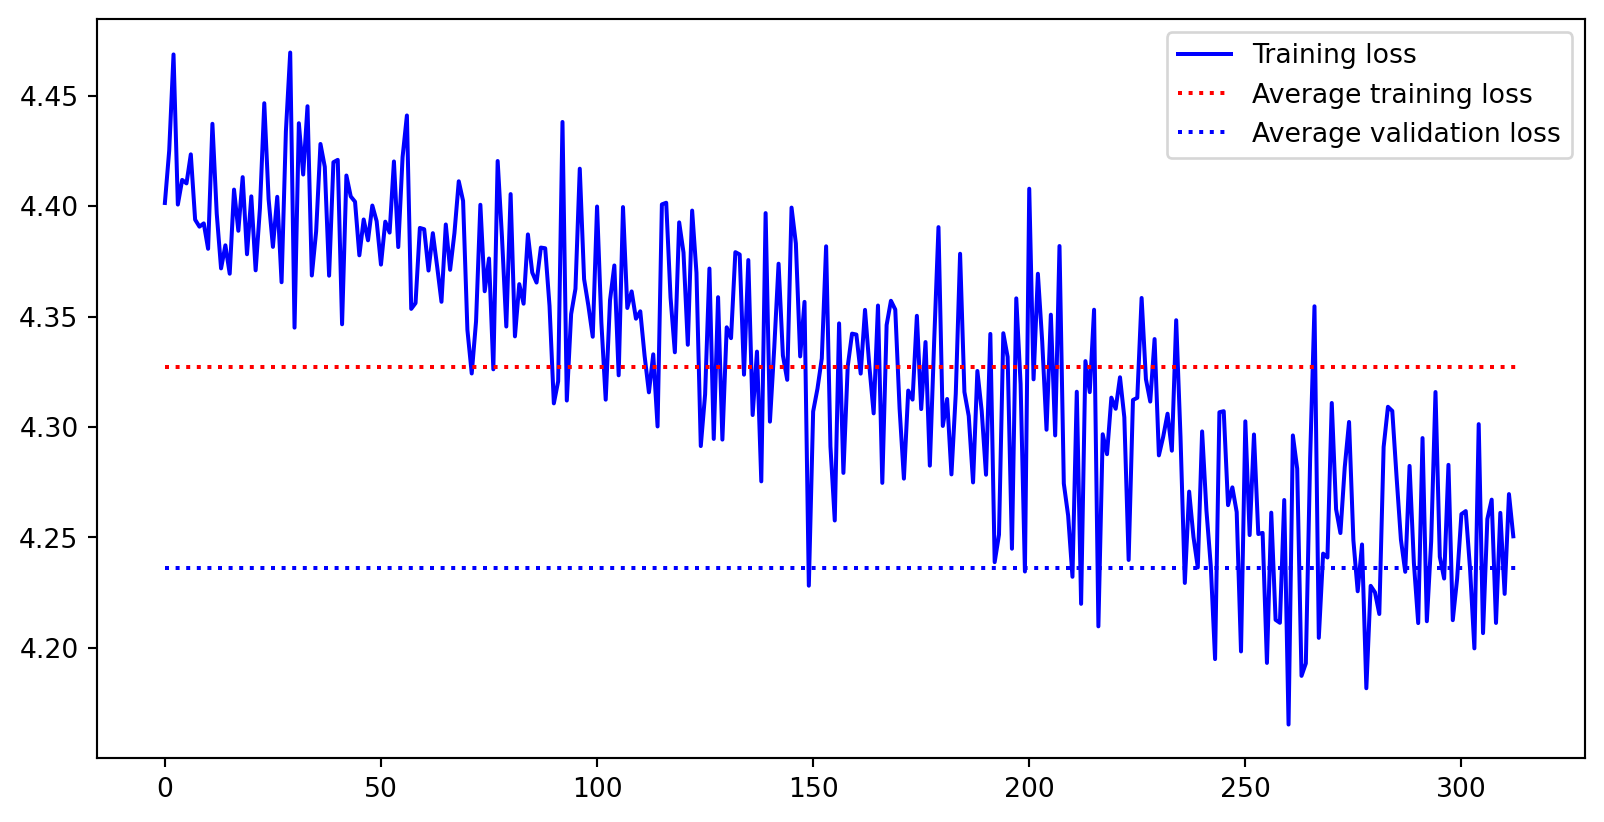

In [27]:
import matplotlib.pyplot as plt

plt.plot(train_loss, "b-", label="Training loss")
plt.plot([0, len(train_loss)], [train_loss_avg, train_loss_avg], "r:", label="Average training loss")
plt.plot([0, len(train_loss)], [val_loss_avg, val_loss_avg], "b:", label="Average validation loss")
plt.legend()
plt.show()

In [28]:
#| echo: false
num_epochs = 10
train_loss = []
val_loss = []

for e in range(num_epochs):
  train_loss_avg = 0
  total_train_samples = 0

  mlp_clf.train()
  for x, y in cifar_train_dl:
    optimizer.zero_grad()

    y_hat = mlp_clf( x.reshape(-1, 3 * 32 * 32) ) # Reshape it into a batch of vectors

    loss = loss_fun(y_hat, y)

    train_loss_avg += loss.item() * len(x)
    total_train_samples += len(x)

    loss.backward()

    optimizer.step()

  train_loss_avg /= total_train_samples
  train_loss.append(train_loss_avg)

  val_loss_avg = 0
  total_val_samples = 0

  mlp_clf.eval()
  with torch.no_grad():
    for x, y in cifar_val_dl:
      y_hat = mlp_clf( x.reshape(-1, 3 * 32 * 32) ) # Reshape it into a batch of vectors
      loss = loss_fun(y_hat, y)

      val_loss_avg += loss.item() * len(x)
      total_val_samples += len(x)

  val_loss_avg /= total_val_samples
  val_loss.append(val_loss_avg)

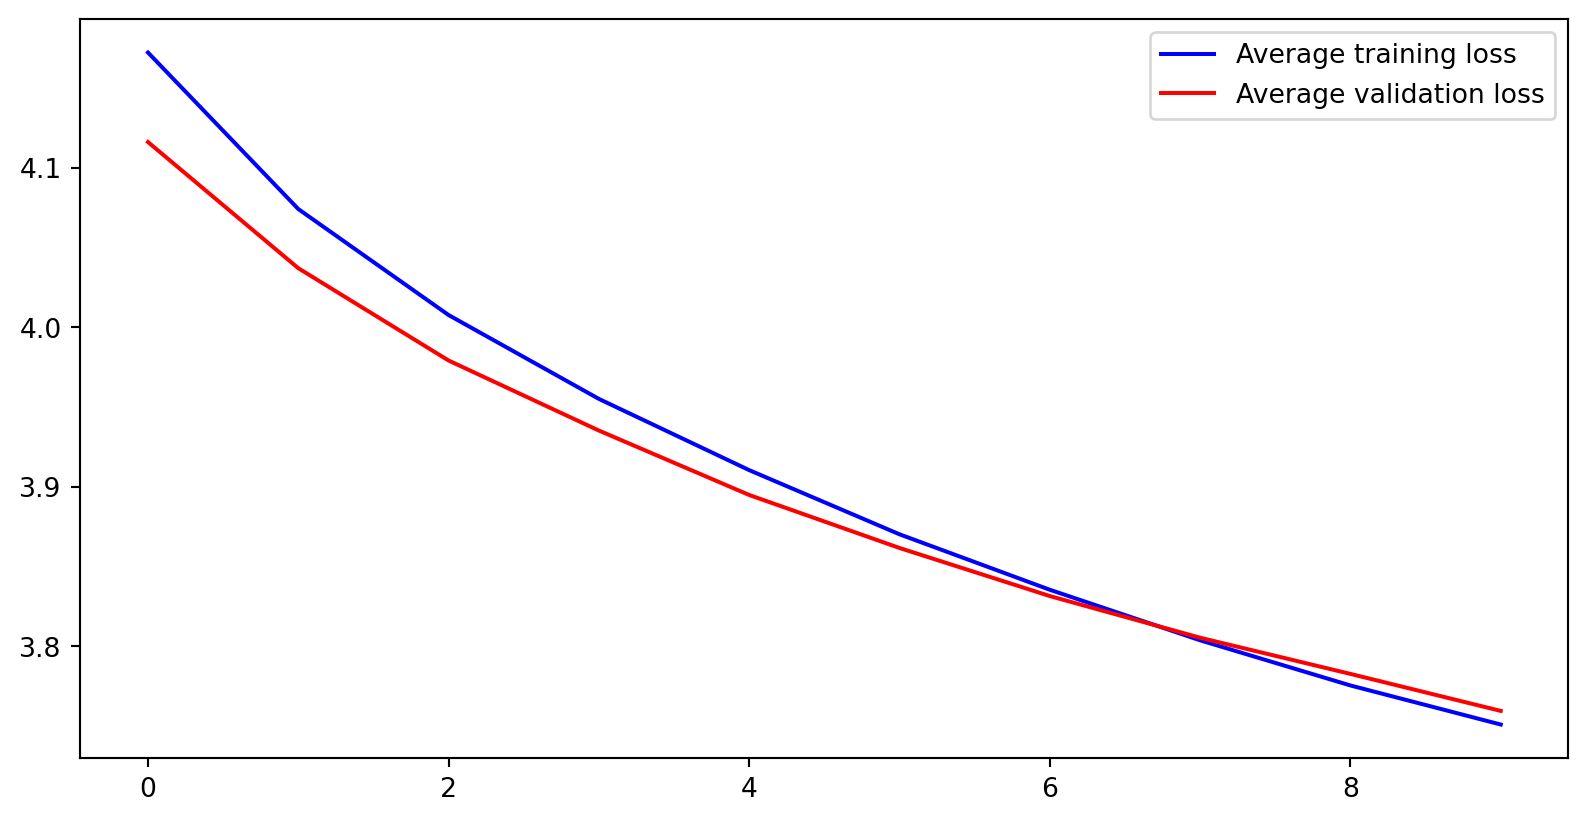

In [29]:
import matplotlib.pyplot as plt

plt.plot(train_loss, "b-", label="Average training loss")
plt.plot(val_loss, "r-", label="Average validation loss")
plt.legend()
plt.show()

In [30]:
from torchmetrics.classification import Accuracy

mlp_clf.eval()

train_acc_metric = Accuracy(task="multiclass", num_classes=100)
val_acc_metric = Accuracy(task="multiclass", num_classes=100)
test_acc_metric = Accuracy(task="multiclass", num_classes=100)

with torch.no_grad():
  for x, y in cifar_train_dl:
    y_hat = mlp_clf( x.reshape(-1, 3 * 32 * 32) )
    train_acc_metric(y_hat.softmax(dim=1), y)

  train_acc = train_acc_metric.compute()

  for x, y in cifar_val_dl:
    y_hat = mlp_clf( x.reshape(-1, 3 * 32 * 32) )
    val_acc_metric(y_hat.softmax(dim=1), y)

  val_acc = val_acc_metric.compute()

  for x, y in cifar_test_dl:
    y_hat = mlp_clf( x.reshape(-1, 3 * 32 * 32) )
    test_acc_metric(y_hat.softmax(dim=1), y)

  test_acc = test_acc_metric.compute()

print(f"Training acc={train_acc}")
print(f"Validation acc={val_acc}")
print(f"Test acc={test_acc}")

train_acc_metric.reset()
val_acc_metric.reset()
test_acc_metric.reset()

ModuleNotFoundError: No module named 'torchmetrics'

In [31]:
kernel = torch.Tensor([[
    [[0, 0, 0],
     [0, 0, 0],
     [0, 0, 0]], # This part of the Kernel will operate on the Red channel of the images

    [[0, 0, 0],
     [0, 0, 0],
     [0, 0, 0]], # This part of the Kernel will operate on the Green channel of the images

    [[0, -1, 0],
     [-1, 5, -1],
     [0, -1, 0]], # This part of the Kernel will operate on the Blue channel of the images
    ]])

In [32]:
im = skimage.data.cat()

x = torch.from_numpy(im).float().permute(2, 0, 1)

# We add a "dummy" dimension to our tensor "x" so it has the BCHW axes
x = x[None, ...]

# Use the con2d function from torch.nn.functional
output = torch.nn.functional.conv2d(x, kernel, padding=0)
output.shape

plt.imshow(output[0, 0], cmap="gray")

NameError: name 'skimage' is not defined

In [33]:
# Use the Conv2d module from torch.nn to define a learnable convolution layer
conv_1 =

SyntaxError: invalid syntax (3094105003.py, line 2)

In [34]:
y = conv_1(x)
y.shape

NameError: name 'conv_1' is not defined

In [35]:
#@title Visualize the output of the randomly initialized kernel of the convolution layer
plt.imshow((y[0].detach().permute(1, 2, 0) - y[0].detach().min()) / (y[0].detach().max() - y[0].detach().min()))

RuntimeError: permute(sparse_coo): number of dimensions in the tensor input does not match the length of the desired ordering of dimensions i.e. input.dim() = 0 is not equal to len(dims) = 3

In [36]:
# Use the Linear module from torch.nn to define a linear operation
lin_1 =

SyntaxError: invalid syntax (3450676994.py, line 2)

In [37]:
# Define a Rectified Linear Unit (ReLU) layer using the torch.nn module
relu_1 =

SyntaxError: invalid syntax (2272392556.py, line 2)